In [2]:
import os
print(os.getcwd())

C:\Users\ACER\Desktop\WEEK9_HW_CS\PYTHON


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("heart.csv")

In [4]:
df.head(5)

,age,sex,Chest main type,Resting blood pressure,cholesterol,Fasting blood sugar,Rest ecg,Max heart rate achieved,Exercise induced angina,St depression,slope,Num major blood vessel,thallassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().sum()

age                        0
sex                        0
Chest main type            0
Resting blood pressure     0
cholesterol                0
Fasting blood sugar        0
Rest ecg                   0
Max heart rate achieved    0
Exercise induced angina    0
St depression              0
slope                      0
Num major blood vessel     0
thallassemia               0
target                     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   Chest main type          302 non-null    int64  
 3   Resting blood pressure   302 non-null    int64  
 4   cholesterol              302 non-null    int64  
 5   Fasting blood sugar      302 non-null    int64  
 6   Rest ecg                 302 non-null    int64  
 7   Max heart rate achieved  302 non-null    int64  
 8   Exercise induced angina  302 non-null    int64  
 9   St depression            302 non-null    float64
 10  slope                    302 non-null    int64  
 11  Num major blood vessel   302 non-null    int64  
 12  thallassemia             302 non-null    int64  
 13  target                   302 non-null    int64  
dtypes: float64(1), int64(13)
m

In [10]:
df.shape

(302, 14)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
Chest main type,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
Resting blood pressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
Fasting blood sugar,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
Rest ecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
Max heart rate achieved,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
Exercise induced angina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
St depression,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


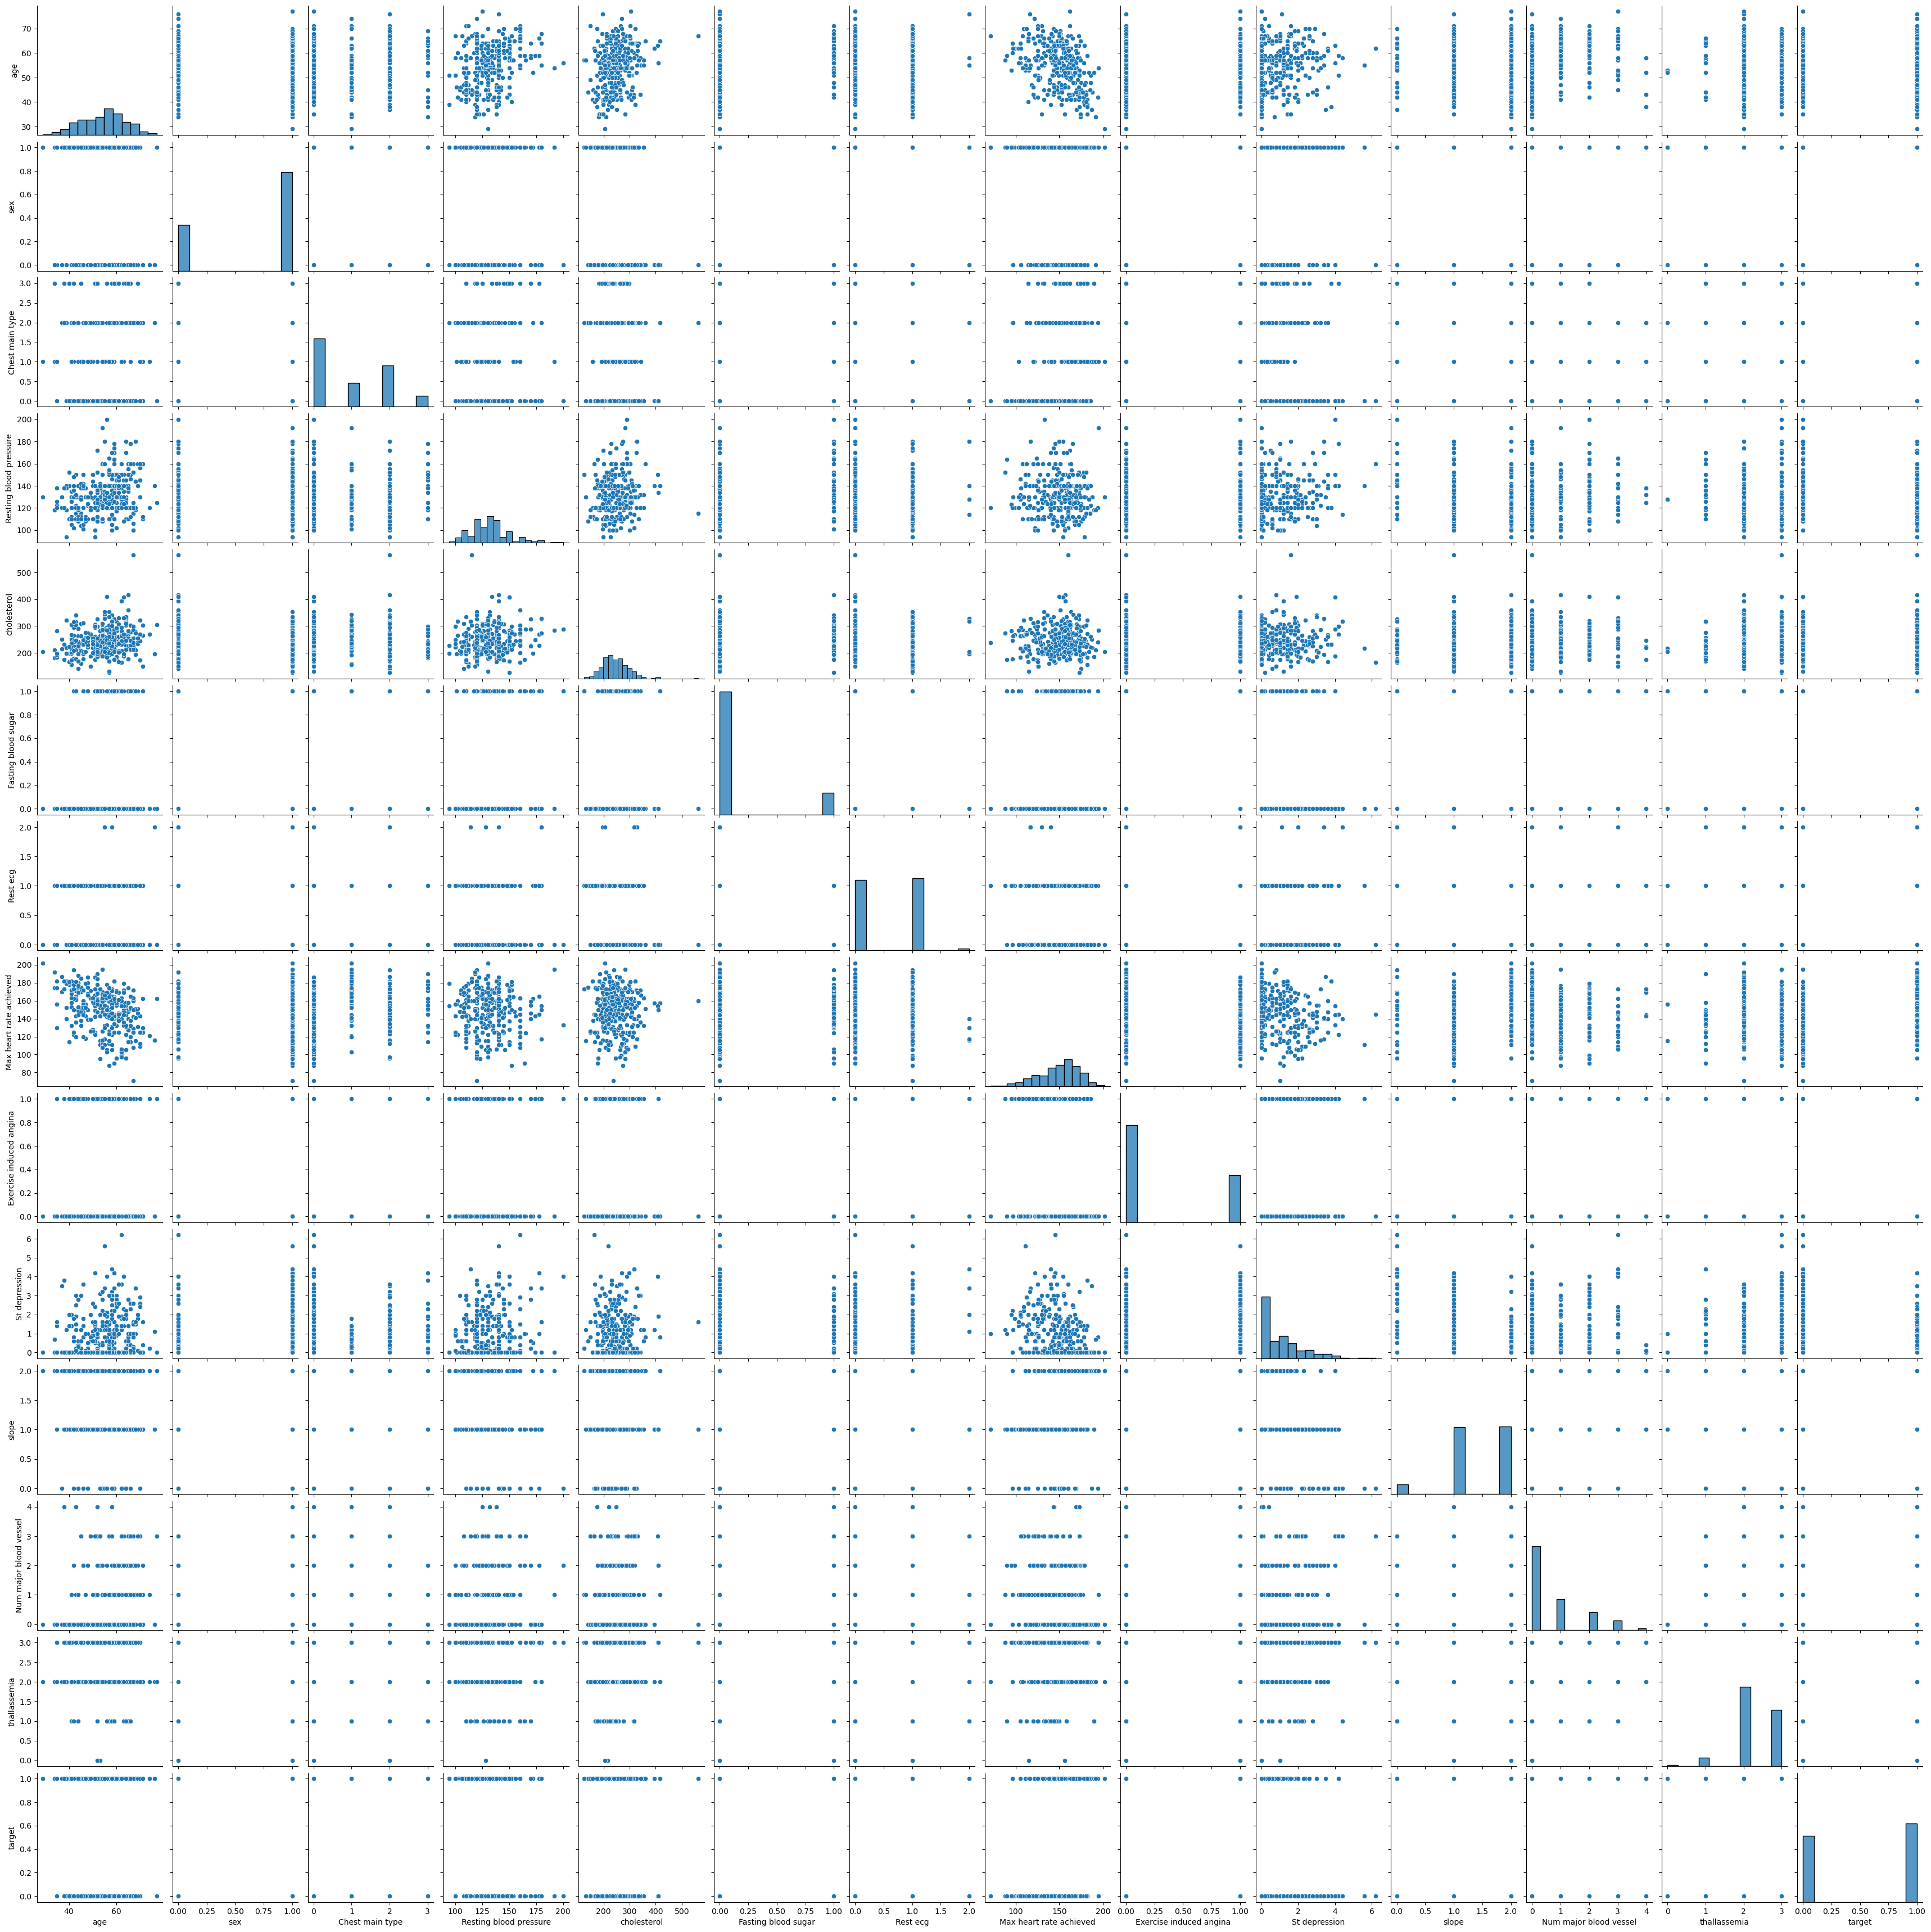

In [12]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

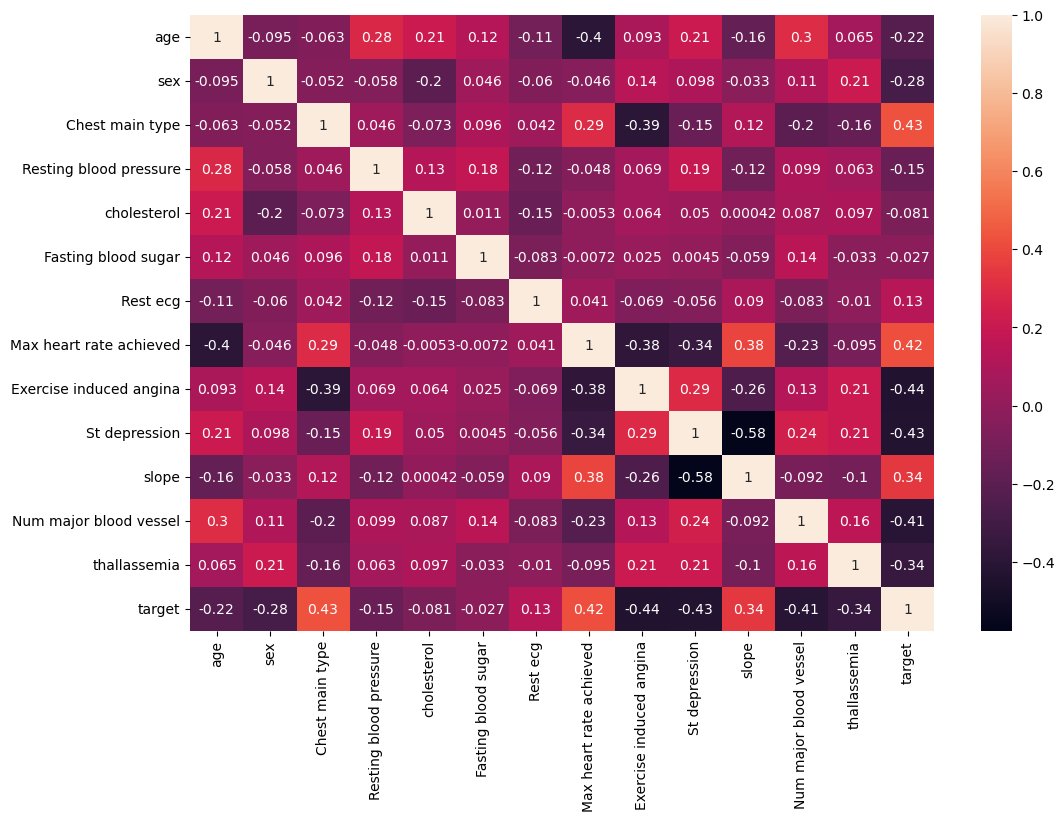

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.columns

Index(['age', 'sex', 'Chest main type', 'Resting blood pressure',
       'cholesterol', 'Fasting blood sugar', 'Rest ecg',
       'Max heart rate achieved', 'Exercise induced angina', 'St depression',
       'slope', 'Num major blood vessel', 'thallassemia', 'target'],
      dtype='object')

In [15]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [16]:
df[['Chest main type','thallassemia']]=df[['Chest main type','thallassemia']].astype(object)
dns_df=df[['Chest main type','thallassemia']]
dns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Chest main type  302 non-null    object
 1   thallassemia     302 non-null    object
dtypes: object(2)
memory usage: 7.1+ KB


In [17]:
dns_df=pd.get_dummies(dns_df,drop_first=True)
df_=df.drop(df.select_dtypes(include=['object']).columns,axis=1)
df_final=pd.concat([df_,dns_df],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   Resting blood pressure   302 non-null    int64  
 3   cholesterol              302 non-null    int64  
 4   Fasting blood sugar      302 non-null    int64  
 5   Rest ecg                 302 non-null    int64  
 6   Max heart rate achieved  302 non-null    int64  
 7   Exercise induced angina  302 non-null    int64  
 8   St depression            302 non-null    float64
 9   slope                    302 non-null    int64  
 10  Num major blood vessel   302 non-null    int64  
 11  target                   302 non-null    int64  
 12  Chest main type_1        302 non-null    uint8  
 13  Chest main type_2        302 non-null    uint8  
 14  Chest main type_3        3

C:\Users\ACER\AppData\Local\Temp\ipykernel_12580\1355903098.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dns_df=pd.get_dummies(dns_df,drop_first=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12580\1355903098.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dns_df=pd.get_dummies(dns_df,drop_first=True)


In [27]:
y=df_final['target'].values
X=df_final.drop('target',axis=1)


In [28]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X_resampled shape: (328, 17)
y_resampled shape: (328,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)



In [31]:
from sklearn.preprocessing import StandardScaler
rc=StandardScaler().fit(X_train)
X_train_scaled=rc.transform(X_train)
X_test_scaled=rc.transform(X_test)

In [32]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

def cross_entropy_loss_derivative(y_true, y_pred):
    return y_pred - y_true

def xavier_init(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim) * np.sqrt(2.0 / (input_dim + output_dim))

input_dim = X_train_scaled.shape[1]
output_dim = 1
hidden1_dim = 6
hidden2_dim = 4
learning_rate = 0.01
epochs = 30

W1 = xavier_init(input_dim, hidden1_dim)
b1 = np.zeros((1, hidden1_dim))
W2 = xavier_init(hidden1_dim, hidden2_dim)
b2 = np.zeros((1, hidden2_dim))
W3 = xavier_init(hidden2_dim, output_dim)
b3 = np.zeros((1, output_dim))

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

for epoch in range(epochs):
    z1 = np.dot(X_train_scaled, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    
    loss = cross_entropy_loss(y_train, a3)
    
    dloss = cross_entropy_loss_derivative(y_train, a3)
    dz3 = dloss
    dW3 = np.dot(a2.T, dz3)
    db3 = np.sum(dz3, axis=0, keepdims=True)
    
    dz2 = np.dot(dz3, W3.T) * (a2 * (1 - a2))
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    dz1 = np.dot(dz2, W2.T) * (a1 * (1 - a1))
    dW1 = np.dot(X_train_scaled.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {loss:.4f}')

z1_test = np.dot(X_test_scaled, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = sigmoid(z2_test)
z3_test = np.dot(a2_test, W3) + b3
a3_test = sigmoid(z3_test)

test_loss = cross_entropy_loss(y_test, a3_test)
print(f'Test Loss: {test_loss:.4f}')


Epoch 0, Training Loss: 0.7777
Epoch 10, Training Loss: 0.6079
Epoch 20, Training Loss: 0.4057
Test Loss: 0.3876


In [33]:
from sklearn.metrics import accuracy_score, classification_report

threshold = 0.5

y_pred_binary = (a3_test > threshold).astype(int)

y_test_binary = y_test.astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')


report = classification_report(y_test_binary, y_pred_binary)
print(report)


Accuracy: 0.8415
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.82      0.88      0.85        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



Dimensions of Matrices and Mini-Batch Training:

Inputs (Features): The input matrix X_train_scaled has dimensions (number of samples, number of features). I used the entire training dataset. Each row represents a patient, and the columns correspond to different features.

Parameters (Weights and Biases): I've defined weight matrices W1, W2, and W3, as well as bias vectors b1, b2, and b3. The dimensions of these matrices depend on the chosen architecture. I have input_dim, hidden1_dim, hidden2_dim, and output_dim variables to determine the dimensions of these matrices. For example, W1 might be of shape (input_dim, hidden1_dim).

Outputs (Predictions): The output matrix a3 represents the predictions. Its shape is determined by my model architecture, and for regression problems, it's often (number of samples, 1).

Mini-Batch Training: To integrate mini-batch training, I would divide the training data into smaller batches. The dimensions of each mini-batch would be (batch_size, number of features) for input data and (batch_size, 1) for labels. I'd perform forward and backward passes for each mini-batch, and the model's weights and biases would be updated after processing each mini-batch. This can help speed up training and potentially improve convergence. I shuffled my training data at the start of each epoch to ensure the batches are random.





How to Check Whether to Keep Training Your Model:
In my code, I am monitoring the training loss, which is a reasonably start for me. To check whether or not I should keep training my model, consider the following aspects:

1. Validation Loss: While it's important to monitor training loss, I should also evaluate the model's performance on a validation dataset. Calculate the validation loss during training. If the validation loss starts increasing or remains stagnant for several epochs, it may indicate overfitting, and I should stop training.

2. Early Stopping: Implement early stopping, which automatically stops training when the validation loss doesn't improve for a specified number of epochs. This prevents overfitting.

3. Learning Curves: Plot learning curves for both training and validation data. If the training loss continues to decrease while the validation loss increases, it's a sign of overfitting.

4. Validation Metrics: Monitor other relevant metrics, such as accuracy or any domain-specific metrics for heart disease prediction, on the validation data. If these metrics stop improving or degrade, it's a sign to stop training.

5. Patience: Define a patience parameter that controls how many epochs to wait without improvement before stopping training. If the patience is reached, stop training.

The goal is to find the right balance between training for better performance and preventing overfitting. Monitoring both training and validation metrics is crucial to make informed decisions about when to stop training your model.